# Ads Click Through Rate Prediction

Ads Click Through Rate is the ratio of how many users clicked on your ad to how many users viewed your ad. For example, 5 out of 100 users click on the ad while watching a youtube video. So, in this case, the CTR of the youtube ad will be 5%. Analyzing the click-through rate help companies in finding the best ad for their target audience.

Ads Click-through rate prediction means predicting whether the user will click on the ad. In the task of ads click-through rate prediction, we need to train a Machine Learning model to find relationships between the characteristics of all the users who click on ads. The dataset that will be used can be downloded from [here](https://statso.io/click-through-rate-analysis-case-study/)

## Ads Click-Through Rate Prediction using Python

Let’s start the task of ads click-through rate prediction by importing the necessary Python libraries and the dataset:

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter
data = pd.read_csv("ad_10000records.csv")
print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: 'ad_10000records.csv'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [ ]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


In [ ]:
unique_counts = data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Clicked on Ad']].nunique()
unique_counts

Daily Time Spent on Site    460
Age                          39
Area Income                 524
Daily Internet Usage        505
Clicked on Ad                 2
dtype: int64

In [ ]:
data['Clicked on Ad'] = data["Clicked on Ad"].map({0: "Not Clicked", 1: "Clicked"})

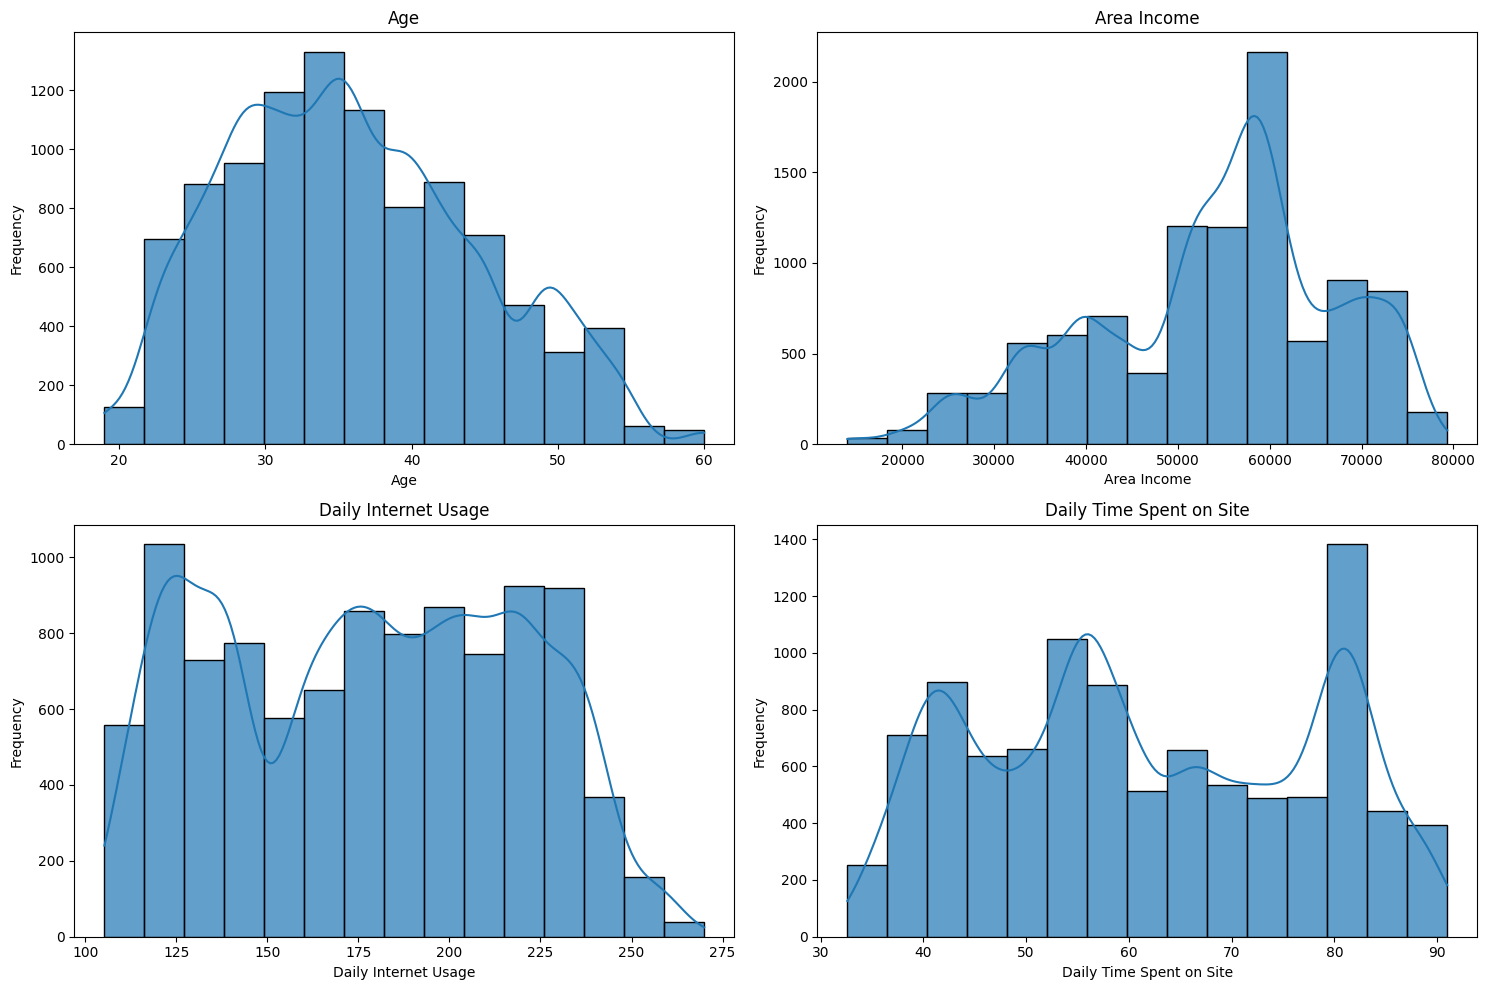

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data['Age'], bins=15, kde=True, ax=axs[0, 0], edgecolor='k',alpha=0.7)
axs[0, 0].set_title('Age')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(data['Area Income'], bins=15, kde=True, ax=axs[0, 1], edgecolor='k',alpha=0.7)
axs[0, 1].set_title('Area Income')
axs[0, 1].set_xlabel('Area Income')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(data['Daily Internet Usage'], bins=15, kde=True, ax=axs[1, 0], edgecolor='k',alpha=0.7)
axs[1, 0].set_title('Daily Internet Usage')
axs[1, 0].set_xlabel('Daily Internet Usage')
axs[1, 0].set_ylabel('Frequency')

sns.histplot(data['Daily Time Spent on Site'], bins=15, kde=True, ax=axs[1, 1], edgecolor='k',alpha=0.7)
axs[1, 1].set_title('Daily Time Spent on Site')
axs[1, 1].set_xlabel('Daily Time Spent on Site')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
fig.savefig('Dataset_distribution.png')

In [ ]:
# Filtrar valores únicos de 'Age' dentro del rango 0 a 60
valores_presentes = data[(data['Age'] >= 0) & (data['Age'] <= 60)]['Age'].unique()

valores_completos = set(range(18, 61))
valores_faltantes = valores_completos - set(valores_presentes)
valores_faltantes = sorted(list(valores_faltantes))

print("Valores entre 0 y 60 que no tienen registros en la columna 'Age':")
print(valores_faltantes)

Valores entre 0 y 60 que no tienen registros en la columna 'Age':
[18, 56, 57, 59]


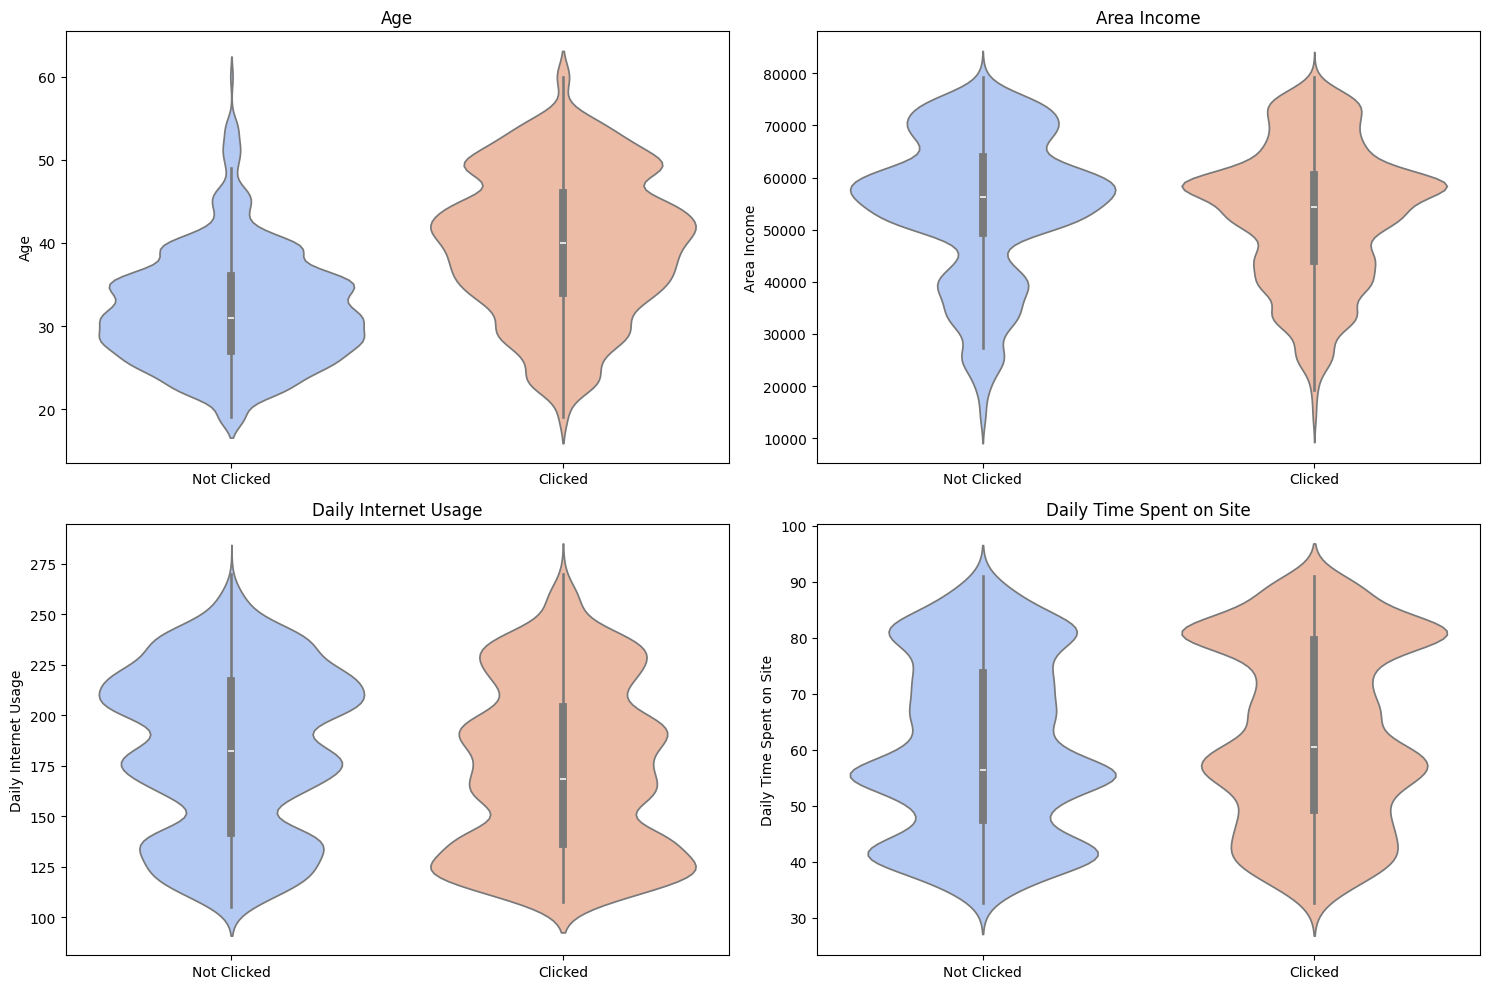

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.violinplot(x='Clicked on Ad', y='Age', hue='Clicked on Ad', data=data, palette='coolwarm', ax=axs[0, 0])
axs[0, 0].set_title('Age')

sns.violinplot(x='Clicked on Ad', y='Area Income', hue='Clicked on Ad',data=data, palette='coolwarm', ax=axs[0, 1])
axs[0, 1].set_title('Area Income')

sns.violinplot(x='Clicked on Ad', y='Daily Internet Usage', hue='Clicked on Ad', data=data, palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title('Daily Internet Usage')

sns.violinplot(x='Clicked on Ad', y='Daily Time Spent on Site', hue='Clicked on Ad',data=data, palette='coolwarm', ax=axs[1, 1])
axs[1, 1].set_title('Daily Time Spent on Site')

for i in range(2):
    for j in range(2):
        axs[i, j].set_xlabel('')
plt.tight_layout()
plt.show()

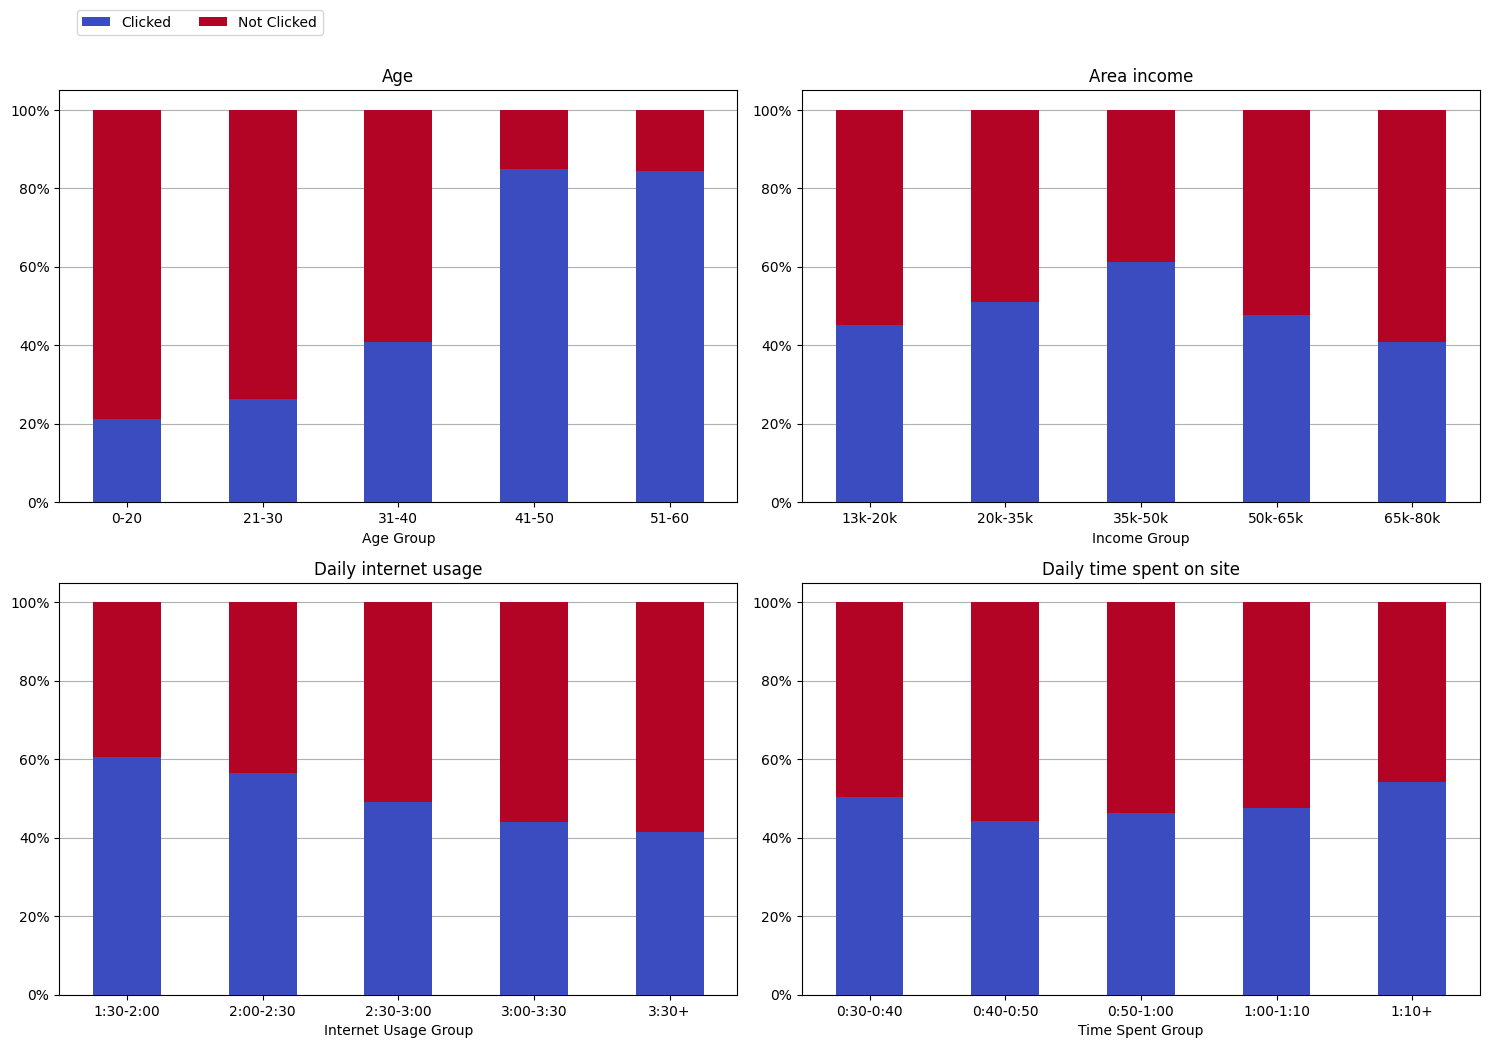

In [ ]:
data['Age Group'] = pd.cut(data['Age'], bins=[0, 20, 30, 40, 50, 60], labels=['0-20', '21-30', '31-40', '41-50', '51-60'])
data['Income Group'] = pd.cut(data['Area Income'], bins=[13000, 20000, 35000, 50000, 65000, 80000], labels=['13k-20k', '20k-35k', '35k-50k', '50k-65k', '65k-80k'])
data['Internet Usage Group'] = pd.cut(data['Daily Internet Usage'], bins=[100, 120, 150, 180, 240, 270], labels=['1:30-2:00', '2:00-2:30', '2:30-3:00', '3:00-3:30', '3:30+'])
data['Time Spent Group'] = pd.cut(data['Daily Time Spent on Site'], bins=[32, 40, 50, 60, 70, 91], labels=['0:30-0:40', '0:40-0:50', '0:50-1:00', '1:00-1:10', '1:10+'])

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

age_counts = pd.crosstab(data['Age Group'], data['Clicked on Ad'], normalize='index')
age_counts.plot(kind='bar', stacked=True, ax=axs[0, 0], colormap='coolwarm', zorder=3)
axs[0, 0].set_title('Age')
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.05, 1.05), ncol=2)

income_counts = pd.crosstab(data['Income Group'], data['Clicked on Ad'], normalize='index')
income_counts.plot(kind='bar', stacked=True, ax=axs[0, 1], colormap='coolwarm', zorder=3)
axs[0, 1].set_title('Area income')

internet_usage_counts = pd.crosstab(data['Internet Usage Group'], data['Clicked on Ad'], normalize='index')
internet_usage_counts.plot(kind='bar', stacked=True, ax=axs[1, 0], colormap='coolwarm', zorder=3)
axs[1, 0].set_title('Daily internet usage')

time_spent_counts = pd.crosstab(data['Time Spent Group'], data['Clicked on Ad'], normalize='index')
time_spent_counts.plot(kind='bar', stacked=True, ax=axs[1, 1], colormap='coolwarm', zorder=3)
axs[1, 1].set_title('Daily time spent on site')

for i in range(2):
    for j in range(2):
        axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), rotation=0, ha='center')
        axs[i, j].yaxis.set_major_formatter(PercentFormatter(1))
        axs[i, j].legend().remove()
        axs[i, j].grid(True, axis='y', zorder=0)
        
plt.tight_layout()
plt.show()
fig.savefig('Dataset_conclusions.png')

## Click through rate analysis

Now let’s analyze the click-through rate based on the time spent by the users on the website

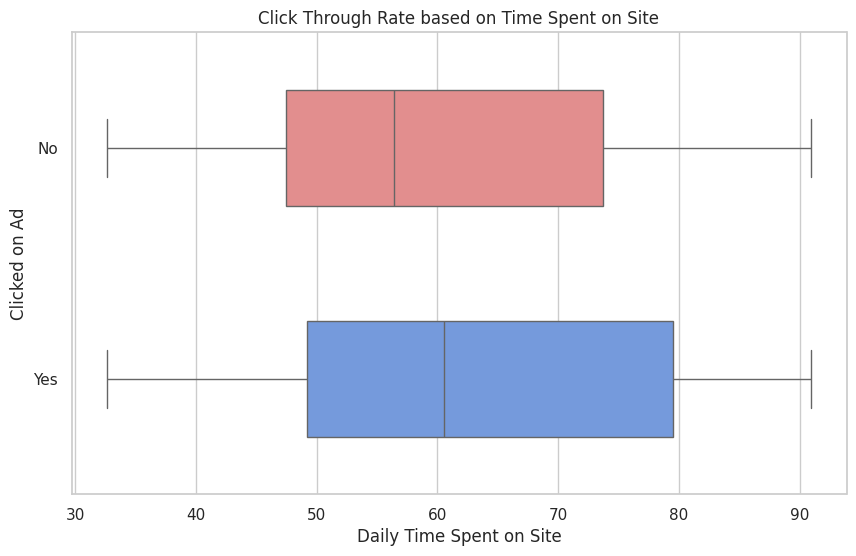

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x="Daily Time Spent on Site",
                       y="Clicked on Ad",
                       hue="Clicked on Ad",
                       data=data,
                       palette={'Yes':'cornflowerblue' ,'No':'lightcoral'},
                      dodge=False,
                      width=0.5)

plt.title("Click Through Rate based on Time Spent on Site")
plt.show()

From the above graph, we can see that the users who spend more time on the website click more on ads. Now let’s analyze the click-through rate based on the daily internet usage of the user:

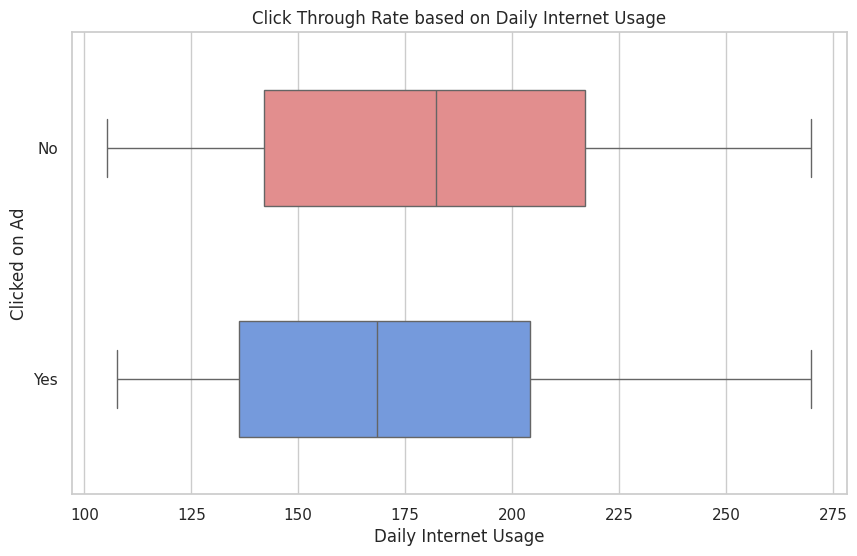

In [ ]:
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x="Daily Internet Usage",
                       y="Clicked on Ad",
                       hue="Clicked on Ad",
                       data=data,
                       palette={'Yes':'cornflowerblue' ,'No':'lightcoral'},
                      dodge=False,
                      width=0.5)

plt.title("Click Through Rate based on Daily Internet Usage")
plt.show()

From the above graph, we can see that the users with high internet usage click less on ads compared to the users with low internet usage. Now let’s analyze the click-through rate based on the age of the users:

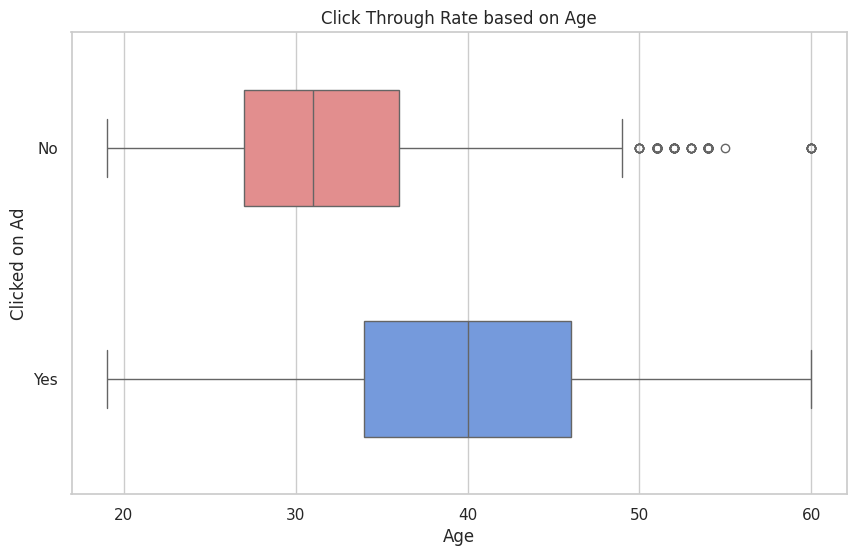

In [ ]:
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x="Age",
                       y="Clicked on Ad",
                       hue="Clicked on Ad",
                       data=data,
                       palette={'Yes':'cornflowerblue' ,'No':'lightcoral'},
                      dodge=False,
                      width=0.5)

plt.title("Click Through Rate based on Age")
plt.show()

From the above graph, we can see that users around 40 years click more on ads compared to users around 27-36 years old. Now let’s analyze the click-through rate based on the income of the users:

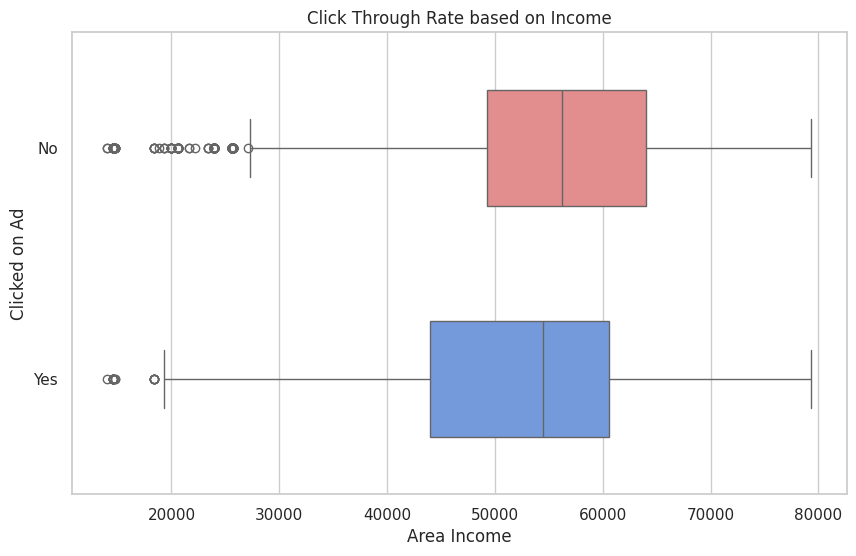

In [ ]:
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x="Area Income",
                       y="Clicked on Ad",
                       hue="Clicked on Ad",
                       data=data,
                       palette={'Yes':'cornflowerblue' ,'No':'lightcoral'},
                      dodge=False,
                      width=0.5)

plt.title("Click Through Rate based on Income")
plt.show()

There’s not much difference, but people from high-income areas click less on ads.

Finally we can plot the correlation matrix of the columns that will be used for training.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding of the columns
data["Gender"] = data["Gender"].map({"Male": 1,
                               "Female": 0})
unique_cities = data['City'].unique()
unique_countries = data['Country'].unique()

label_encoders = {}
for col in ['City', 'Gender', 'Country']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Creation of the datasets and train/test split
data = data.drop('Timestamp',axis=1)

y=data['Clicked on Ad']
x=data.drop(['Ad Topic Line','Clicked on Ad'],axis=1)

correlation_matrix = x.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Adjust 'cmap' for colormap options
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.title('Correlation Matrix')
plt.show()

Looking at the plot there is not a high correlation between any of the features. This is good because it indicates the problem of multicollinearity is not present in our data.

## Calculating CTR of Ads

Now let’s calculate the overall Ads click-through rate. Here we need to calculate the ratio of users who clicked on the ad to users who left an impression on the ad. So let’s see the distribution of users:

In [ ]:
data["Clicked on Ad"].value_counts()

So 4917 out of 10000 users clicked on the ads. Let’s calculate the CTR:

In [ ]:
click_through_rate = 4917 / 10000 * 100
print(click_through_rate)

## Click Through Rate Prediction Model

### Feature selection and preprocessing

Now let’s move on to training a Machine Learning model to predict click-through rate. We'll start by checking the string columns, since they must be preprocessed before feeding them into the classifiers. There are 4 string columns: Ad Topic Line, Country, City and Gender.

The gender can be just Male or Female, so let's focus in the other three columns. Let's do a quick inspection of all of them:

In [ ]:
# Cities
unique_cities = data['City'].nunique()
city_counts = data['City'].value_counts()
city_less_than_10 = len(city_counts[city_counts < 10])
print(f'Number of different cities in the dataset: {unique_cities}')
print(f'Number of cities that appear less than 10 times: {city_less_than_10}')

# Countries
unique_countries = data['Country'].nunique()
countries_counts = data['Country'].value_counts()
countries_less_than_10 = len(countries_counts[countries_counts < 10])
print(f'Number of different countries in the dataset: {unique_countries}')
print(f'Number of countries that appear less than 10 times: {countries_less_than_10}')

# Ads Topics Lines
unique_ads_topic_lines = data['Ad Topic Line'].nunique()
ads_topics_lines_counts = data['Ad Topic Line'].value_counts()
ads_topics_lines_less_than_10 = len(ads_topics_lines_counts[ads_topics_lines_counts < 10])
print(f'Number of different ads topic lines in the dataset: {unique_ads_topic_lines}')
print(f'Number of ads topic lines that appear less than 10 times: {ads_topics_lines_less_than_10}')

What we see from there is that there is a very high number of different values in the three columns, moore if we take into account that we have only 10000 row of data. Furthermore, there is a high imbalance in all three columns since there are many values appearing in 10 or less samples. Neverthless, we'll consider the city and the country because they have been proved to improve the accuracy when we use them. As a future improvement, ways of encoding the Ad Topic Line. We could use a pretrained LLM to generate embeddings, or a Bag of Words to represent all the vocabulary present in the data.

Other important thing to take into account in every machine learning task is normalization. When values in one feature are very different between each other some algorithms work unexpectedly giving poor results. But this is not the case in Logistic Regression and tree-based models like Random Forests and XGBoost, so we don't need it here.

That said, now let's process the columns Gender, City and Country through a binary mapping and label encoders respectively. Then we create the final dataset used for training based on what we said. Also, we map the target column again to 0 and 1.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("ad_10000records.csv")

# Gender mapping
data["Gender"] = data["Gender"].map({"Male": 1,
                               "Female": 0})
# Countries and cities mapping
unique_cities = data['City'].unique()
unique_countries = data['Country'].unique()
label_encoders = {}
for col in ['City', 'Gender', 'Country']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

x = data.drop('Timestamp',axis=1)

y=data['Clicked on Ad']
x=x.drop(['Ad Topic Line','Clicked on Ad'],axis=1)

xtrain,xtest,ytrain,ytest=train_test_split(x,y,
                                           test_size=0.2,
                                           random_state=4)

Now let's build our machine learning models. Three of them will be tried:

- **Random Forest**
- **XGBoost**
- **Logistic Regression**

In all of them we will use a random search algorithm to look for the best possible hyperparameter set. This is justified in the following section.

### Grid Search

To obtain the best possible set of hyperparameters we will use a Grid Search. We first tried a Random Search but we were obtaining poor results. In fact, the results were worse than training with the default ones. That's why we tried to use Grid Search including in the grid the default parameters, to see if actually those are the best results or any other configuration outperforms it.

This is feasible just because this problem is simple so not much time is needed to train the model. Random search is preferred in many cases due to this reason, and other ones such as that avoid getting stuck in a local optima. But in this particular case after trial and error it didn't work.

### Random Forest

We define the hyperparameters to be searched and fit the model to look for the best hyperparameters, using Grid Search.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 4, 8, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=3)
grid_search.fit(xtrain, ytrain)

Now let's see the best params found by the Grid Search.

In [ ]:
grid_search.best_params_

We can also take a look to all the configurations tried within the search with the accuracy they achieved.

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results[[
    'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
    'mean_test_score', 'std_test_score',
]].head()

Now let's evaluate our model in the best hyperparameter set returned by the Grid Search.

In [ ]:
from sklearn.metrics import accuracy_score
best_model = grid_search.best_estimator_
y_pred = best_model.predict(xtest)
print(accuracy_score(ytest,y_pred))

As we see we get a pretty good result, now let'see some performance metrics to further analyze the goodness of our results. First we start by getting an insight of the most relevant features when creating the decision trees.

In [ ]:
feature_names = xtrain.columns
feature_importance = best_model.feature_importances_
for i, feature_name in enumerate(feature_names):
    print(f"Feature {feature_name}: {feature_importance[i]:.4f}")

This tells us that the age is quite important when determining if a user will click on the ad. Now let's see some classification metrics.

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate the different metrics
print(f"Recall: {recall_score(ytest, y_pred):.4f}")
print(f"Precision: {precision_score(ytest, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(ytest, y_pred):.4f}")
print(f"F1-Score: {f1_score(ytest, y_pred):.4f}")

# Calculate and plot ROC AUC score
roc_auc = roc_auc_score(ytest, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")
fpr, tpr, _ = roc_curve(ytest, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Confusion matrix
import seaborn as sns  # Import seaborn for colormap

cm = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(8, 6))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize by row sums
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5,
            annot_kws={"fontsize": 26})  # Adjust font size here
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### XGBoost

Now let's train an XGBoost model to see if we can further improve the results. We'll do a Grid Search as in the case of Random Forest, for the same reasons mentioned above.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

xgb_model = xgb.XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [75, 100, 125],
    'max_depth': [2, 4, 6],
    'tree_method': ['auto','approx','hist'],
    'lambda': [0.9,1,1.1]
}

grid_search = GridSearchCV(xgb_model, param_grid=param_grid, cv=3)
grid_search.fit(xtrain, ytrain)

The best params in this case are the following

In [ ]:
grid_search.best_params_

We can see as before a dataframe containing all the models trained sorted by its accuracy.

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results.head()

Finally, we test our best model in the test dataset.

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(xtest)
print(accuracy_score(ytest,y_pred))

Let's see the featurs importance in case of the XGBoost.

In [ ]:
eature_names = xtrain.columns
feature_importance = best_model.feature_importances_
for i, feature_name in enumerate(feature_names):
    print(f"Feature {feature_name}: {feature_importance[i]:.4f}")

Now let's calculate different classification metrics and the ROC AUC curve.

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate the different metrics
print(f"Recall: {recall_score(ytest, y_pred):.4f}")
print(f"Precision: {precision_score(ytest, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(ytest, y_pred):.4f}")
print(f"F1-Score: {f1_score(ytest, y_pred):.4f}")

# Calculate and plot ROC AUC score
roc_auc = roc_auc_score(ytest, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")
fpr, tpr, _ = roc_curve(ytest, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

Finally we plot the confusion matrix

In [ ]:
# Confusion matrix
import seaborn as sns  # Import seaborn for colormap

cm = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(8, 6))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize by row sums
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5,
            annot_kws={"fontsize": 26})  # Adjust font size here
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The results are a bit better than in the case of Random Forest, but not too much. Further hyperparameter tuning could be done to try to improve these results. Now let's see the metrics and the confusion matrix.

### Logistic Regression

Finally, we try a model that might not be the one that achieves the best accuracy, but it has something that the other ones don't: explainability.

Random forests and XGBoost are considered blackbox models because we can't really know what is happening inside them and how do they make decisions.

Now we'll explore one of the most famous white-box models, logistic regression, and we'll see which features contribute the most and the least to our model.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')  # Choose appropriate solver (e.g., 'liblinear' for smaller datasets)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

Analogous to before we show different metrics, the ROC AUC curve and the confusion matrix

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate the different metrics
print(f"Recall: {recall_score(ytest, y_pred):.4f}")
print(f"Precision: {precision_score(ytest, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(ytest, y_pred):.4f}")
print(f"F1-Score: {f1_score(ytest, y_pred):.4f}")

# Calculate and plot ROC AUC score
roc_auc = roc_auc_score(ytest, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")
fpr, tpr, _ = roc_curve(ytest, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Confusion matrix
import seaborn as sns  # Import seaborn for colormap

cm = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(8, 6))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize by row sums
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5)  # Adjust colormap as desired
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Now let's interpret the coefficients of the model, by looking at the odds of them. For each feature the coefficient represents the impact in the log(odds) of increasing in one unit the feature value, remaining the rest of them constant. To get the odds we just simply do $e^{\beta_i}$, where $\beta_i$ is the coefficient of the feature $i$.

The general formula of the logistic regression is the following:

$$ln(\frac{p}{1-p}) = y = \beta_0 + \beta_1 * x_1 + \beta_2 * x_2 + ...$$

In [ ]:
feature_names = xtrain.columns
coefficients = model.coef_.ravel()
odds_ratios = np.exp(coefficients)

for i, feature_name in enumerate(feature_names):
    print(f"Coefficient {feature_name}: {coefficients[i]:.4f}")
    print(f"Odds Ratio {feature_name}: {odds_ratios[i]:.4f}")

Looking at the results we can see that most of the odds are nearly 1, what indicates that there is not a strong relation between any of the features and the target.